# ELG7186 - fall 2022 - Assignment 1
## Due: <strong>Wednesday Oct. 12<sup>th</sup> 2022 -- 11:59pm</strong>

The purpose of this assignment is to gain some experience working with the tools you will use throughout the course. You will learn:
- The basics of data loading and preparation
- Classification using the k-NN algorithm
- Classification using a Support Vector Machine (SVM)
- Calculation of metrics to assess the performance of your model

### Submission Details
Submit your Jupyter notebook .ipynb file using Brightspace. Do not include any other files or images as they will not be reviewed.
<p>
<strong>Make certain that you run all the cells in the notebook you will submit</strong> or you will loose marks.
</p>
<ul>
<li>You can submit multiple times, but only the most recent submission will be saved</li>
<li>Do not wait until the last minute to submit in case you have an unexpected issue</li>
<li>Review the late policy in the syllabus</li>
<li><strong>You must submit your own work</strong> and abide by the University of Ottawa policy on plagiarism and fraud</li>
</ul>


## Part 0. Dataset Preparation
To complete the assignment you will need to download the Cifar10 dataset and devise an appropriate training set split. You may acquire the dataset using the method of your choice. Note that some sources e.g. sklearn have reduced the samples to only 1797 (this could negatively affect your results). If you use the full dataset, you are free to sample from the dataset to reduce the overal training samples. The overall accuracy is less important than your  observations and comparisons. For example classifying the full 10,000 test images might take approximately 15 minutes using k-NN.

In this section:
<ul>
<li>Download the dataset as described above</li>
<li>Divide the raw data into appropriate training and test sets for both the images and corresponding labels for use with the subsequent parts of the assignment.</li>
<li>Visualize five samples of each class by plotting a grid using the matplotlib library.</li>
</ul>


In [82]:
# Prepare your dataset here and display samples here.
import time
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from scipy.spatial import distance
from keras.datasets import cifar10
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [46]:
!pip install scikit-image

     ---------------------------------------- 12.1/12.1 MB 3.1 MB/s eta 0:00:00
     -------------------------------------- 210.3/210.3 kB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 3.4/3.4 MB 3.2 MB/s eta 0:00:00
  Using cached networkx-2.8.7-py3-none-any.whl (2.0 MB)
     ---------------------------------------- 4.2/4.2 MB 3.3 MB/s eta 0:00:00


In [83]:
warnings.filterwarnings("ignore")

In [84]:
def draw_func(list_of_imgs):
  try:
    fig = plt.figure(figsize=(20, 20))
    grid = ImageGrid(fig, 111, nrows_ncols=(1, 5), axes_pad=0.1)
    for ax, im in zip(grid, list_of_imgs):
      ax.imshow(im, cmap=plt.cm.gray)
  except:
    pass
  plt.show()

In [85]:
def ConfusionMatrix(Y_Actual, Y_Pred):
        CF = confusion_matrix(Y_Actual, Y_Pred)
        return CF

def PLOT_ConfusionMatrix(CF,Title):
        sns.heatmap(CF, annot=True, fmt='d')
        plt.title(Title, fontsize = 15)
        plt.xlabel('Predicted', fontsize = 15)
        plt.ylabel('Actual', fontsize = 15)
        return plt.show()

def Plot(X,Y,Label,Color, Marker , S , Xlabel , Ylabel , Title):
        plt.plot(X, Y, label = Label, c = Color)
        plt.scatter(X,Y, c=Color, marker = Marker , s=S)
        plt.xlabel(Xlabel)
        plt.xlabel(Ylabel)
        plt.title(Title)
        plt.xscale('log')
        plt.yscale('log')
        plt.legend()
        plt.show()
        return plt

In [86]:
(x_train_total, y_train_total), (x_test_total, y_test_total) = cifar10.load_data()

In [87]:
print("Shape of the total training data:")
print(x_train_total.shape)
print(y_train_total.shape)
print("Shape of the total testing data:")
print(x_test_total.shape)
print(y_test_total.shape)

Shape of the total training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of the total testing data:
(10000, 32, 32, 3)
(10000, 1)


In [88]:
y_train_total = y_train_total.squeeze()
y_train_total = pd.DataFrame(y_train_total)
list_of_indices = []

# i will take 700 samples from each class

for i in range(10):
    list_of_indices.append(y_train_total.loc[y_train_total[0] == i].index)
    list_of_indices[i] = list_of_indices[i][0:700]
    print(len(list_of_indices[i]), "images from class number : ", i)
    
y_train_total = y_train_total.to_numpy().squeeze()

700 images from class number :  0
700 images from class number :  1
700 images from class number :  2
700 images from class number :  3
700 images from class number :  4
700 images from class number :  5
700 images from class number :  6
700 images from class number :  7
700 images from class number :  8
700 images from class number :  9


In [89]:
x_train = []
y_train = []
for i in range(10):
    for j in range(700):
        x_train.append(x_train_total[list_of_indices[i][j]])
        y_train.append(y_train_total[list_of_indices[i][j]])

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
print("Shape of the new train")
print("x_train : ", x_train.shape)
print("y_train : ", y_train.shape)

Shape of the new train
x_train :  (7000, 32, 32, 3)
y_train :  (7000,)


########################################## Class Number :  0  ##########################################


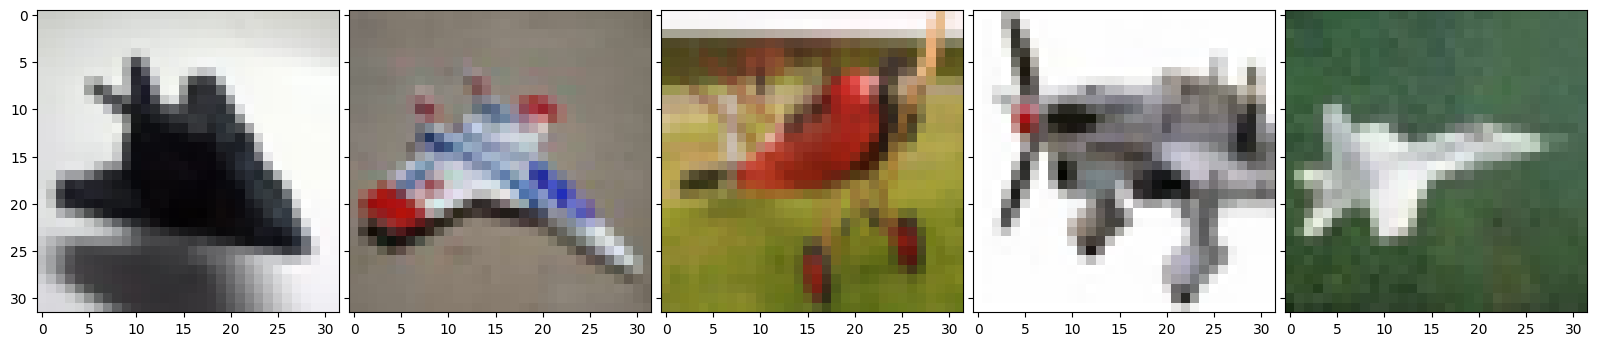

########################################## Class Number :  1  ##########################################


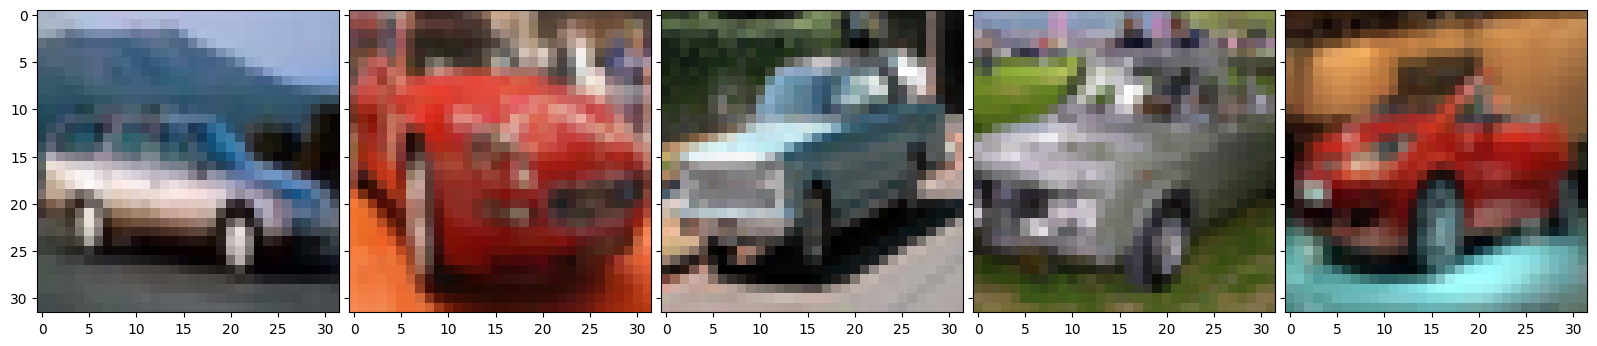

########################################## Class Number :  2  ##########################################


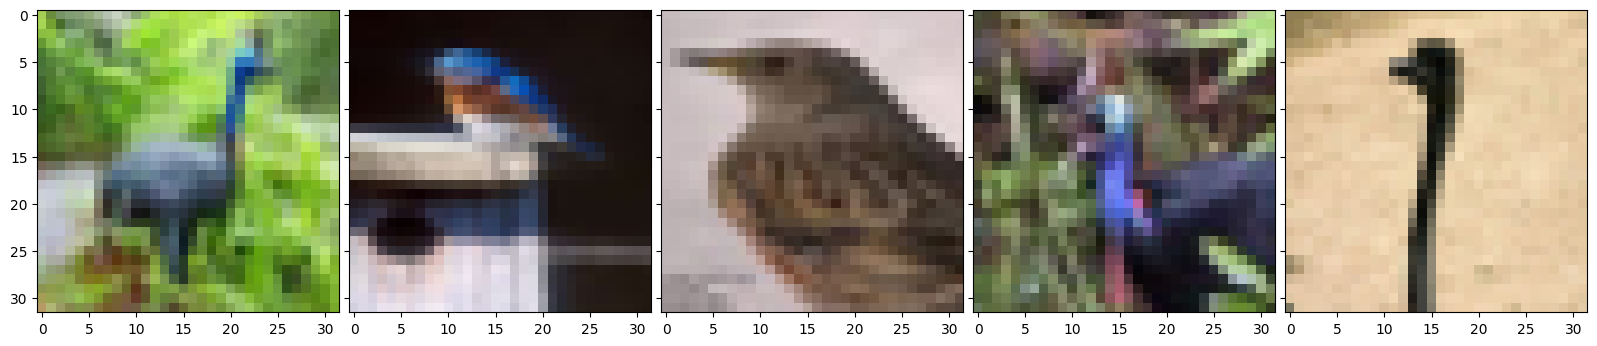

########################################## Class Number :  3  ##########################################


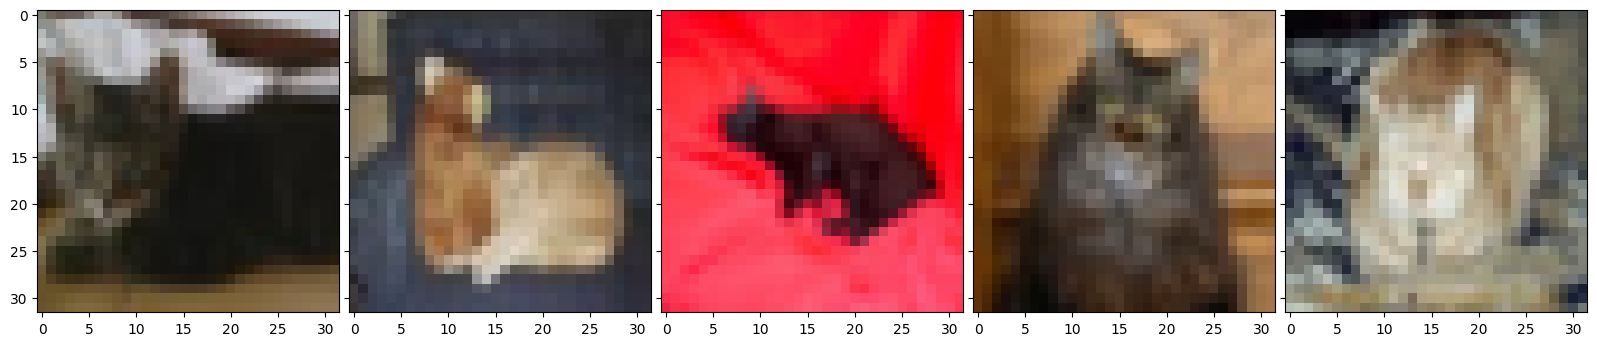

########################################## Class Number :  4  ##########################################


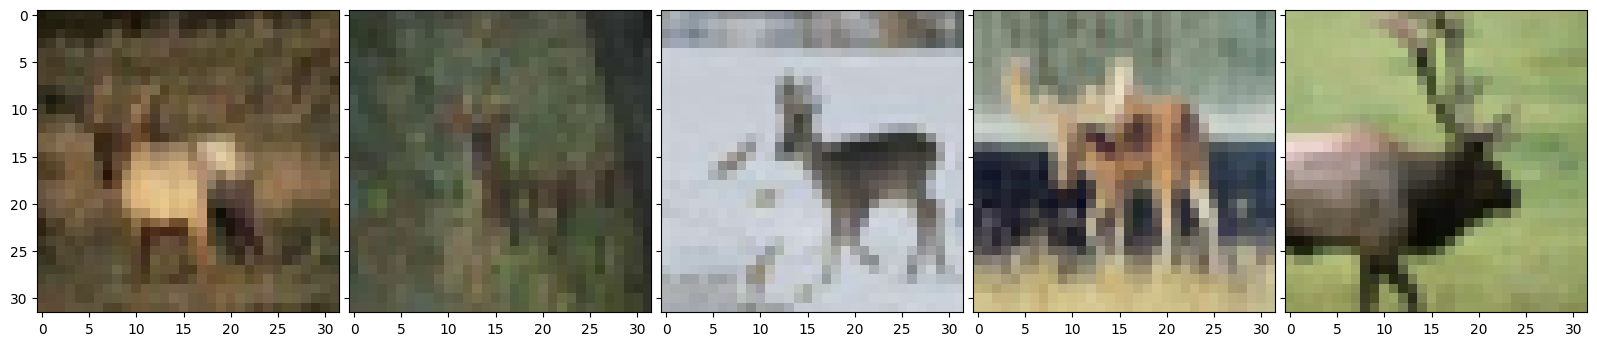

########################################## Class Number :  5  ##########################################


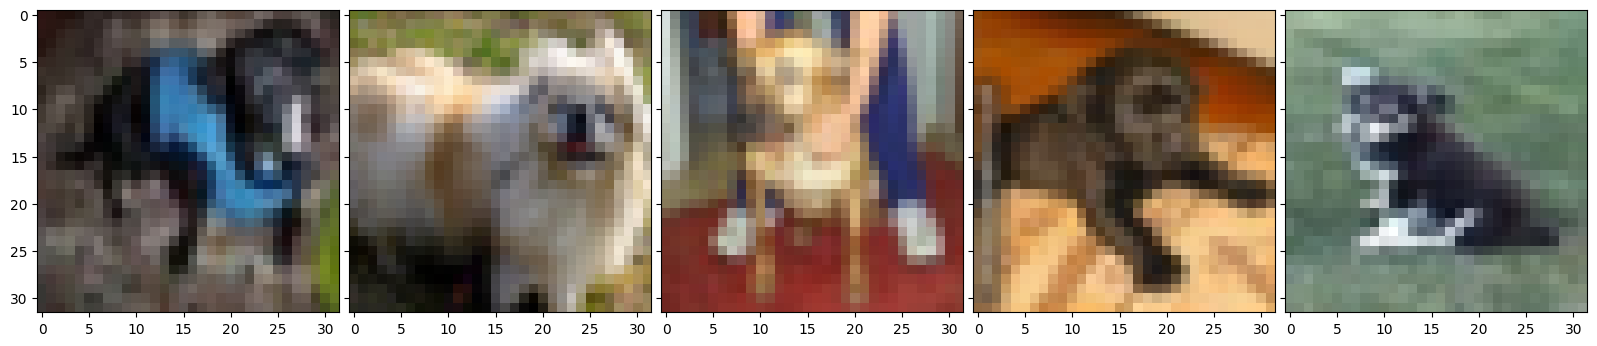

########################################## Class Number :  6  ##########################################


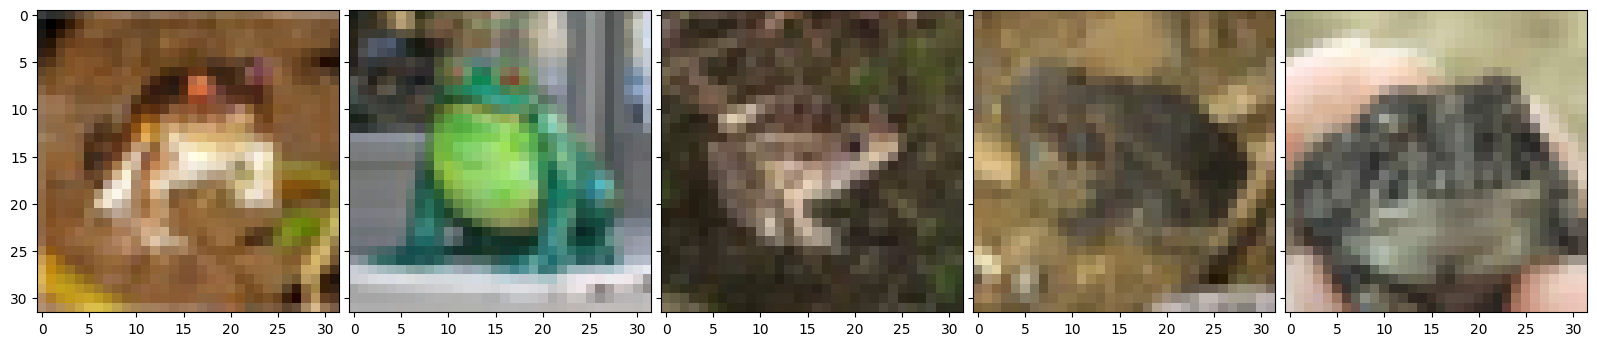

########################################## Class Number :  7  ##########################################


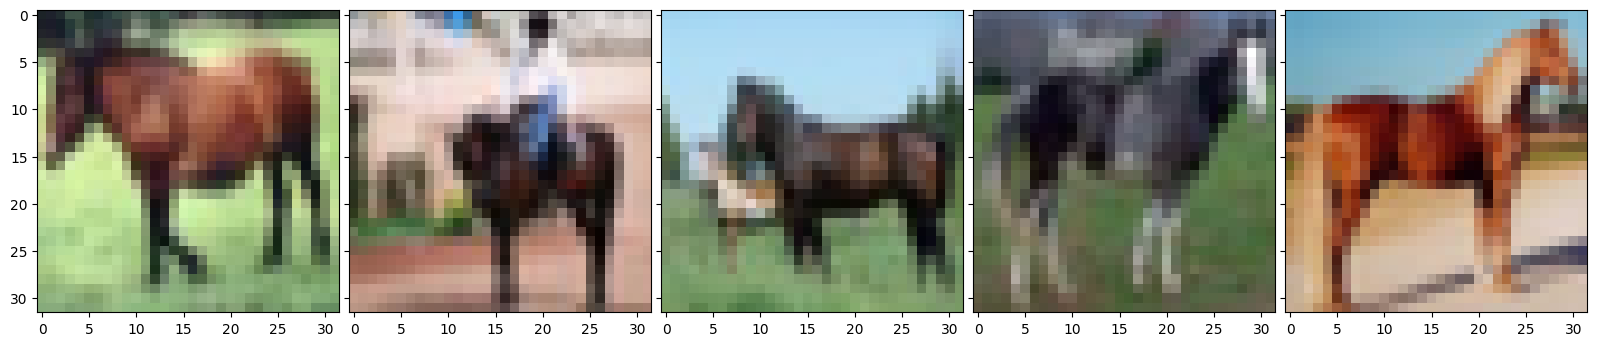

########################################## Class Number :  8  ##########################################


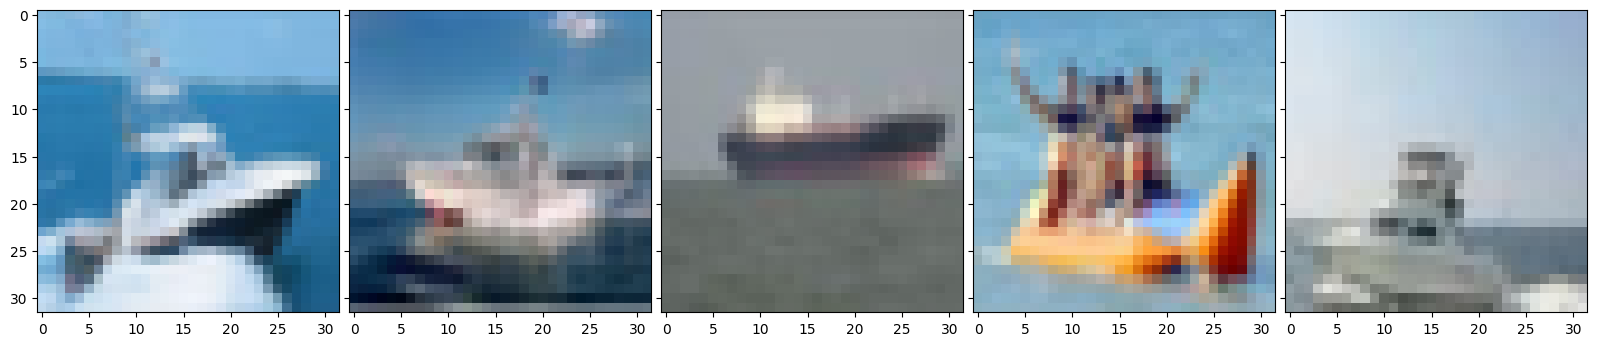

########################################## Class Number :  9  ##########################################


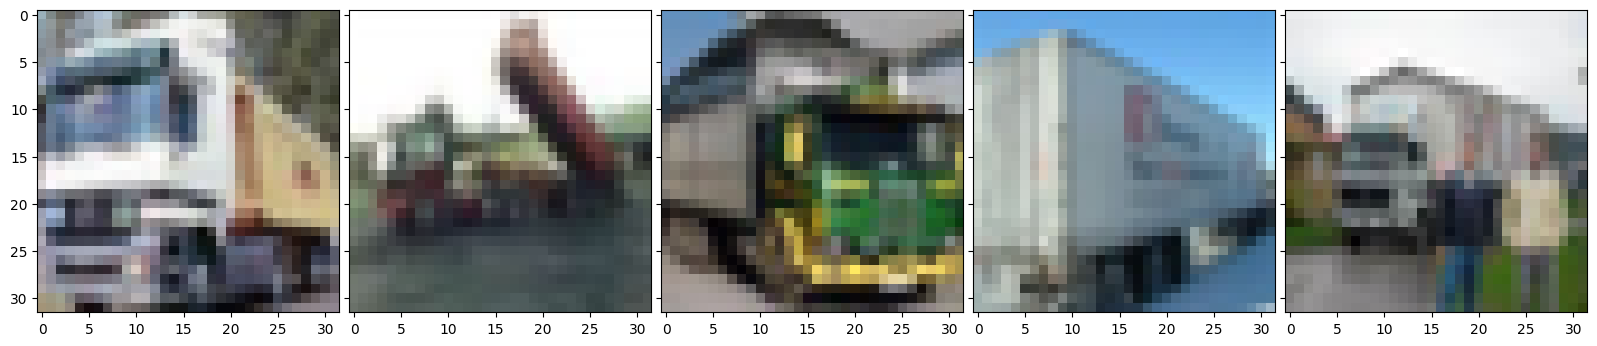

In [90]:
start = 0
end = 5
for i in range(10):
    print("########################################## Class Number : ", i, " ##########################################")
    # function to plot the images in grid 
    draw_func(x_train[start:end])
    start = start + 700
    end = end + 700

# shuffle the data
np.random.seed(45)
np.random.shuffle(x_train)
np.random.seed(45)
np.random.shuffle(y_train)
np.random.seed(45)
np.random.shuffle(x_test_total)
np.random.seed(45)
np.random.shuffle(y_test_total)

# reshape the train
x_train = x_train.reshape(7000, 3072)
x_test_total = x_test_total.reshape(10000, 3072)
x_test = x_test_total[0:2000,:]
y_test = y_test_total[0:2000,:]

## Part 1. k-NN Classifier (2 Marks)
For this section you will implement a simple kNN Classifier on the Cifar10 dataset. To do this you will need to perform the following steps:
- Create a k-NN class. Your class must contain a method that returns predictions for your test set.
- Provide a suitable distance metric that you will use to calculate the nearest neightbours. You may choose the distance metric you believe is most suitable.
- Calculate the k nearest neighbours and make predictions.
- Choose the a value for _k_ that results in the highest accuracy on your test set. Show how you found this value.

When your classifier is working:
- Use sklearn to calculate accuracy and plot a confusion matrix using your predictions.
- Provide a brief discussion of your results

### Bonus:

When you compute the distance metric you can acheive better performance if you vectorize the computation instead of using for loops to iterate through the values. You can earn __0.5 bonus marks__ if you only need one loop, or __1 bonus mark__ if you can omit for loops for a fully vectorized distance calculation (a maximum of 1 bonus mark is available).




In [10]:
# Write your KNN class here
class KNN:
    
    # the default number of neighbors 
    def __init__ (self, n_neighbors = 3):
        self.n_neighbors  = n_neighbors
    
    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
    
    def predict(self, x_test):
        self.x_test = x_test
        
        # Compute distances without using loops (if faster around 10 times from using nested for loops)
        dist_mtx = distance.cdist(self.x_test, self.x_train, metric = "euclidean")

        # copy the matrix of distances to help me to get the indices of the minimum values of each row (except 0)        
        temp = dist_mtx.copy()
        
        # sort the matrix and get the minimum k values of each row
        dist_mtx = np.sort(dist_mtx)[:, 0:self.n_neighbors]
                    
        # get the indices of these minimum values
        indices = []
        for i in range(len(dist_mtx)):
            for j in range(self.n_neighbors):
                indices.append(np.where(temp[i] == dist_mtx[i][j])[0][0])
                
        indices = np.array(indices)
        indices = indices.reshape(len(self.x_test),self.n_neighbors)
        
        # predict by voting between the number of k (get the most repeated value) 
        predicted_labels = []
        for row in indices:
            predicted_labels.append(np.argmax(np.bincount(self.y_train[row])))
            
        predicted_labels = np.array(predicted_labels)

        return predicted_labels

Total Time of My KNN : 34.15855360031128
Total Time of sklearn KNN : 1.391383409500122
My KNN accuracy :  0.2805
sklearn KNN accuracy :  0.2805


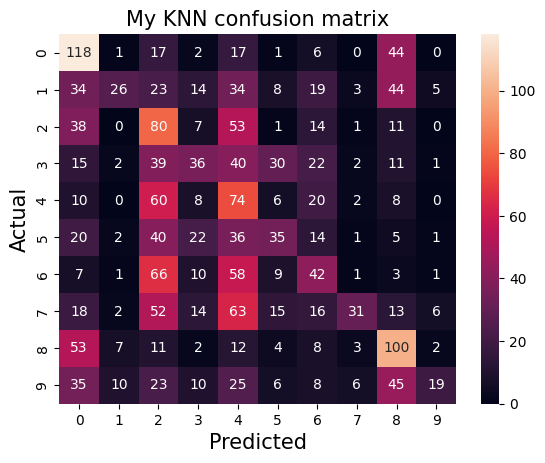

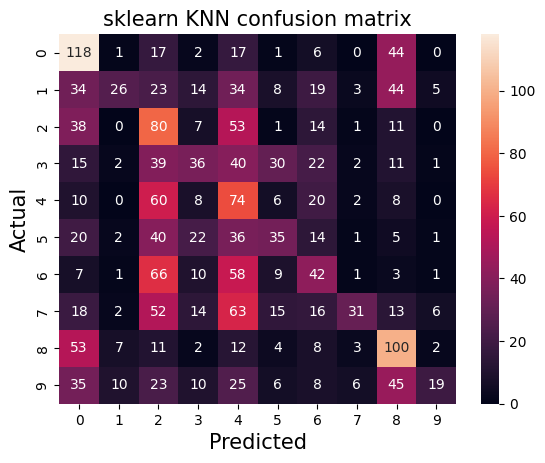

In [11]:
##################################### my KNN CLass
start = time.time()
obj = KNN(n_neighbors = 5)
obj.fit(x_train, y_train)
y_pred = obj.predict(x_test)
stop = time.time()
print("Total Time of My KNN :", stop - start)

##################################### sklearn KNN CLass
start = time.time()
obj_sklearn = KNeighborsClassifier(n_neighbors = 5)
obj_sklearn.fit(x_train, y_train)
y_pred_sklearn = obj_sklearn.predict(x_test)
stop = time.time()
print("Total Time of sklearn KNN :", stop - start)

##################################### Test the results of the two models
print("My KNN accuracy : ", accuracy_score(y_test,y_pred))
print("sklearn KNN accuracy : ", accuracy_score(y_test,y_pred_sklearn))

my_KNN_CF = ConfusionMatrix(y_test, y_pred)
PLOT_ConfusionMatrix(my_KNN_CF,"My KNN confusion matrix")

sklearn_KNN_CF = ConfusionMatrix(y_test, y_pred_sklearn)
PLOT_ConfusionMatrix(sklearn_KNN_CF,"sklearn KNN confusion matrix")

## knn results discussion

first i have tried nested for loop for the distance computation and it took around 1000 seconds to run 
but now with the vectorization method that i have used it took only as mentioned above (Total Time of My KNN : 34.15855360031128) and it gave the same result as sklearn knn.

but sklearn knn is a lot faster because they using different methods and algorithms to compute the nearest neighbors as showen below.
 
the below text is from sklearn knn documentation.

algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’

Algorithm used to compute the nearest neighbors:

‘ball_tree’ will use BallTree

‘kd_tree’ will use KDTree

‘brute’ will use a brute-force search.

‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.

reference: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

## Part 2. Logistic Regression (3 Marks)

For this section you will perform binary classification using logistic regression. Just as in Part 1. you will use the Cifar10 dataset, however to obtain a result for each class using logistic regression you will need to use a One-vs-Rest (OvR) approach to acheive multi-class classification.

Using ```LogisticRegression()``` in sklearn, write a function to execute the OvR strategy for the Cifar10 classes. Do not use the built-in ```OneVsResClassifier()``` method. You will need to follow these basic steps:
- Train a binary classifier for each class, where the target class is a "positive" results and the combination of the remaining classes are "negative". For Cifar10 you will need 10 models.
- For each test sample compute the probabilities for each model
- Select the argmax of the probabilities to obtain the predicted class

Collect your predictions from the test set and compute the accuracy score and plot a confusion matrix.

the accuracy of OVR logistic regression is :  0.31


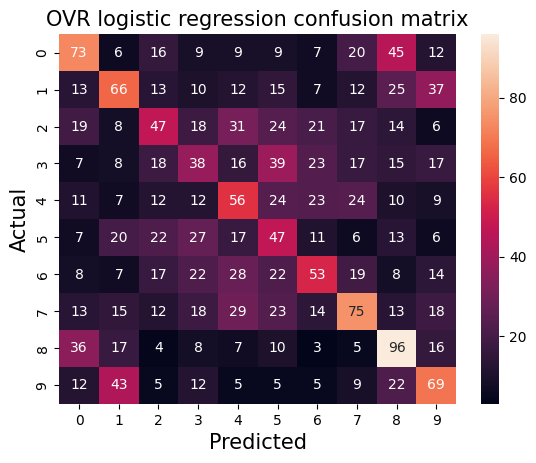

In [12]:
# Write your logistic regression code here.
y_train_OVR = []

# get the new y_train for each class
for i in range(10):
    temp_y_train = y_train.copy()
    temp_y_train = pd.DataFrame(temp_y_train)
    temp_y_train[temp_y_train==i] = 10
    temp_y_train[temp_y_train!=10] = 0
    temp_y_train[temp_y_train==10] = 1
    temp_y_train = temp_y_train.to_numpy()
    y_train_OVR.append(temp_y_train)
    
porbabilities = []

# train the 9 models to get thier porbabilities.
for i in range(10):
    clf = LogisticRegression(random_state = 42)
    clf.fit(x_train, y_train_OVR[i].ravel())
    porbabilities.append(clf.predict_proba(x_test)[:,1].reshape(-1,1))

# Aggregate the results of these models.
temp = np.hstack(porbabilities)
y_pred_logistic = np.argmax(temp, axis=1)

##################################### Test the results of the OVR Logistic Regression
print("the accuracy of OVR logistic regression is : ", accuracy_score(y_test, y_pred_logistic))

OVR_logistic_CF = ConfusionMatrix(y_test, y_pred_logistic)
PLOT_ConfusionMatrix(OVR_logistic_CF,"OVR logistic regression confusion matrix")

## Part 3. Support Vector Machine (SVM) Classification (4 Marks)

In Part 3. you will use Scikit-learn to perform classification, again on the Cifar10 dataset. You can use the built in SVM library for classification. As with logistic regression, SVM is designed for binary classification. However, in this case Scikit-learn will handle the OvR models behind the scenes.

Your task is to compare different modes of the SVM and determine the best performer. 

Create an SVM baseline using the <code>LinearSVC()</code> function. Make sure to use the primal solution and use "ovr" for multiclass Calculate the accuracy score for comparison.

Next you will explore the effect of the cost parameter on the accuracy.
    <ul>
    <li>Run the classification with a range of C values For example: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]</li>
    <li>Plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>

Add a regularization term.
    <ul>
    <li>Rerun the above experiment, but this time use L1 regularization.</li>
    <li>Again, plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>

For the final experiment you will use the ```SVC()``` function to run the classifer with a kernel.
    <ul>
    <li>Use a radial basis function when training a new model</li>
    <li>Find the optimal combination of values for the cost and gamma parameters. Use the following values in your loop:<br/>
        <div style="margin-left:40px"><code>
        for cost in [0.01, 0.1, 1, 10, 100]:<br/>
        &emsp;for gamma in [0.01, 0.1, 1, 10, 100]:
        </code></div>
    </li>
    <li>Again, plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>


Choose the model with the highest accuracy and plot the confusion matrix. In your discussion explain the results of your experiments and the reason for increased performance from the baseline (if any). Comment on the effect of the cost-paramenter and the L1 penalty on accuracy as well as any overfitting you observed. Discuss the confusion matrix of the model accuracy and provide some reasons for high-values found off the main diagonal.

### Bonus Mark
Instead of using raw pixel values compute an alternate feature representation for your dataset and re-run train the model. Compare the accuracy of the model using the new feature representation with the model trained with pixel values.

In [13]:
# Run your SVM experiments here.
############################################ BaseLine Model
start = time.time()
model_SCV = LinearSVC(multi_class='ovr')
model_SCV.fit(x_train, y_train.ravel())
y_pred_SCV = model_SCV.predict(x_test)
stop = time.time()
print("Total Time is :", stop - start)
print("the accuracy of OVR LinearSVC is : ", accuracy_score(y_test, y_pred_SCV))

Total Time is : 288.6908140182495
the accuracy of OVR LinearSVC is :  0.263


the accuracy of OVR LinearSVC when C =  0.0001  is :  0.232
the accuracy of OVR LinearSVC when C =  0.001  is :  0.2565
the accuracy of OVR LinearSVC when C =  0.01  is :  0.2095
the accuracy of OVR LinearSVC when C =  0.1  is :  0.2255
the accuracy of OVR LinearSVC when C =  1  is :  0.2635
the accuracy of OVR LinearSVC when C =  10  is :  0.2095
the accuracy of OVR LinearSVC when C =  100  is :  0.221
the accuracy of OVR LinearSVC when C =  1000  is :  0.234
Total Time is : 2310.823522567749


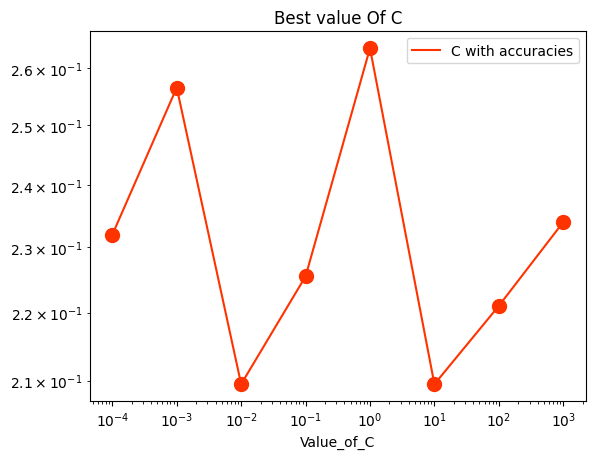

<module 'matplotlib.pyplot' from 'C:\\Users\\Hosam\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [14]:
############################################ change the cost parameter
accuracies_C = []

start = time.time()
for i in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    model_C = LinearSVC(multi_class='ovr', C = i)
    model_C.fit(x_train, y_train.ravel())
    y_pred_SCV_C = model_C.predict(x_test)
    print("the accuracy of OVR LinearSVC when C = ",i, " is : ", accuracy_score(y_test, y_pred_SCV_C))
    accuracies_C.append(accuracy_score(y_test, y_pred_SCV_C))
    
stop = time.time()
print("Total Time is :", stop - start)

Plot([0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],accuracies_C,'C with accuracies','#FF3300', 'o' , 100 , "Accuracies",'Value_of_C','Best value Of C')

the accuracy of OVR LinearSVC when C =  0.0001  is :  0.373
the accuracy of OVR LinearSVC when C =  0.001  is :  0.3605
the accuracy of OVR LinearSVC when C =  0.01  is :  0.29
the accuracy of OVR LinearSVC when C =  0.1  is :  0.2845
the accuracy of OVR LinearSVC when C =  1  is :  0.2815
the accuracy of OVR LinearSVC when C =  10  is :  0.2835
the accuracy of OVR LinearSVC when C =  100  is :  0.2825
the accuracy of OVR LinearSVC when C =  1000  is :  0.2845
Total Time is : 9251.589142560959


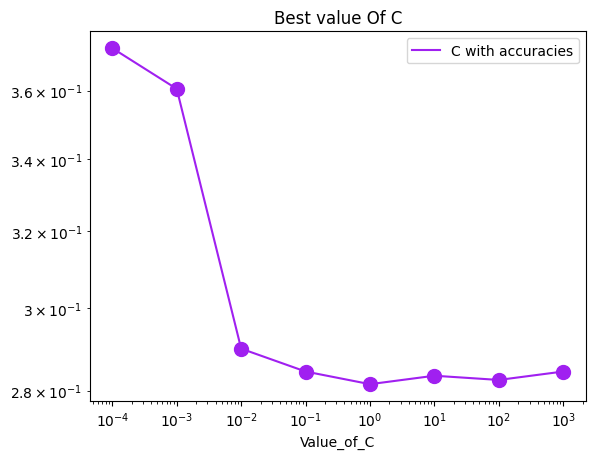

<module 'matplotlib.pyplot' from 'C:\\Users\\Hosam\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [15]:
############################################ Add the Regulization term L1
accuracies_L1 = []

start = time.time()
for i in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    model_L1 = LinearSVC(multi_class='ovr', C = i, penalty='l1', dual = False)
    model_L1.fit(x_train, y_train.ravel())
    y_pred_SCV_L1 = model_L1.predict(x_test)
    print("the accuracy of OVR LinearSVC when C = ",i, " is : ", accuracy_score(y_test, y_pred_SCV_L1))
    accuracies_L1.append(accuracy_score(y_test, y_pred_SCV_L1))
    
stop = time.time()
print("Total Time is :", stop - start)

Plot([0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],accuracies_L1,'C with accuracies','#A020F0', 'o' , 100 , 'Accuracies', 'Value_of_C', 'Best value Of C')

the accuracy of SVC rbf when C =  0.01  and Gamma =  0.01  is :  0.099
the accuracy of SVC rbf when C =  0.01  and Gamma =  0.1  is :  0.218
the accuracy of SVC rbf when C =  0.01  and Gamma =  1  is :  0.1285
the accuracy of SVC rbf when C =  0.01  and Gamma =  10  is :  0.0935
the accuracy of SVC rbf when C =  0.01  and Gamma =  100  is :  0.0935
the accuracy of SVC rbf when C =  0.1  and Gamma =  0.01  is :  0.099
the accuracy of SVC rbf when C =  0.1  and Gamma =  0.1  is :  0.218
the accuracy of SVC rbf when C =  0.1  and Gamma =  1  is :  0.1285
the accuracy of SVC rbf when C =  0.1  and Gamma =  10  is :  0.0935
the accuracy of SVC rbf when C =  0.1  and Gamma =  100  is :  0.0935
the accuracy of SVC rbf when C =  1  and Gamma =  0.01  is :  0.133
the accuracy of SVC rbf when C =  1  and Gamma =  0.1  is :  0.0965
the accuracy of SVC rbf when C =  1  and Gamma =  1  is :  0.1285
the accuracy of SVC rbf when C =  1  and Gamma =  10  is :  0.0935
the accuracy of SVC rbf when C =  

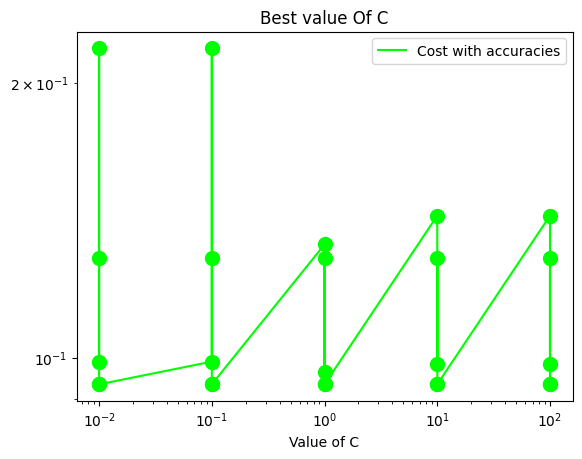

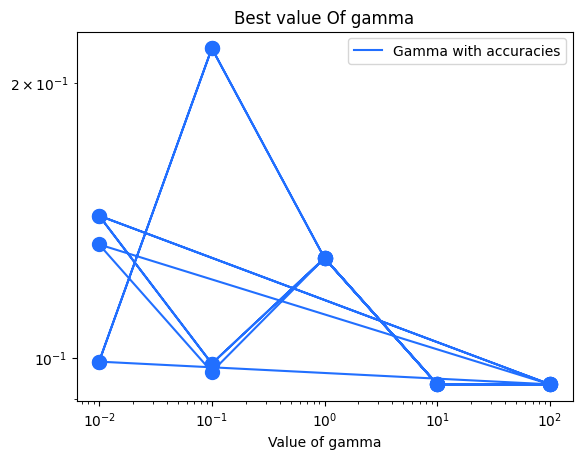

<module 'matplotlib.pyplot' from 'C:\\Users\\Hosam\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [91]:
############################################ SVC
accuracies_clf_SVC = []

# it recommended to scale the data when trying SVC (without scaling i got the same Accuracies)
scaler = StandardScaler()
x_new_train_SVC = scaler.fit_transform(x_train)
x_new_test_SVC = scaler.transform(x_test)

start = time.time()
for cost in [0.01, 0.1, 1, 10, 100]:
    for gammaa in [0.01, 0.1, 1, 10, 100]:
        clf_SVC = SVC(C = cost, kernel='rbf', gamma = gammaa)
        clf_SVC.fit(x_new_train_SVC, y_train.ravel())
        y_pred_clf_SVC = clf_SVC.predict(x_new_test_SVC)
        print("the accuracy of SVC rbf when C = ",cost, " and Gamma = ", gammaa, " is : ", accuracy_score(y_test, y_pred_clf_SVC))
        accuracies_clf_SVC.append(accuracy_score(y_test, y_pred_clf_SVC))
        
stop = time.time()
print("Total Time is :", stop - start)

cost_values = [0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,10,10,10,10,10,100,100,100,100,100]
gamma_values = [0.01,0.1,1,10,100,0.01,0.1,1,10,100,0.01,0.1,1,10,100,0.01,0.1,1,10,100,0.01,0.1,1,10,100]

print("the length of the cost values list is : ", len(cost_values))
print("the length of the gamma values list is : ", len(gamma_values))

Plot(cost_values, accuracies_clf_SVC,'Cost with accuracies','#00FF00', 'o' , 100 , 'Accuracies' ,'Value of C' , 'Best value Of C')
Plot(gamma_values, accuracies_clf_SVC,'Gamma with accuracies','#216fff', 'o' , 100 , 'Accuracies', 'Value of gamma', 'Best value Of gamma')

################################################# grey Images


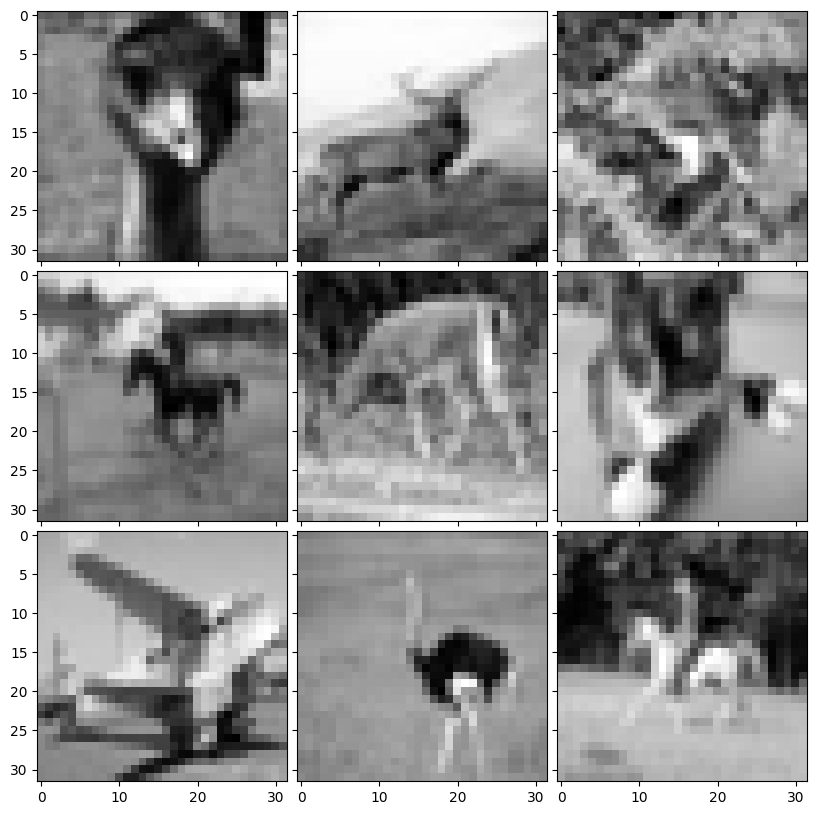

################################################# Adaptive Histogram equalizer Images


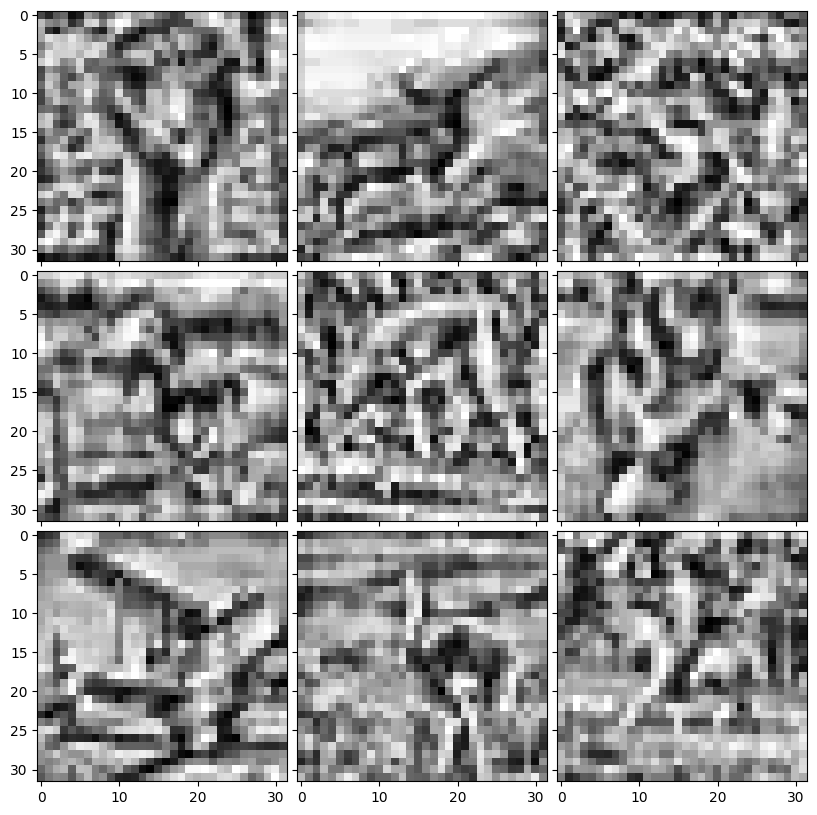

################################################# sobel over Adaptive Histogram equalizer Images


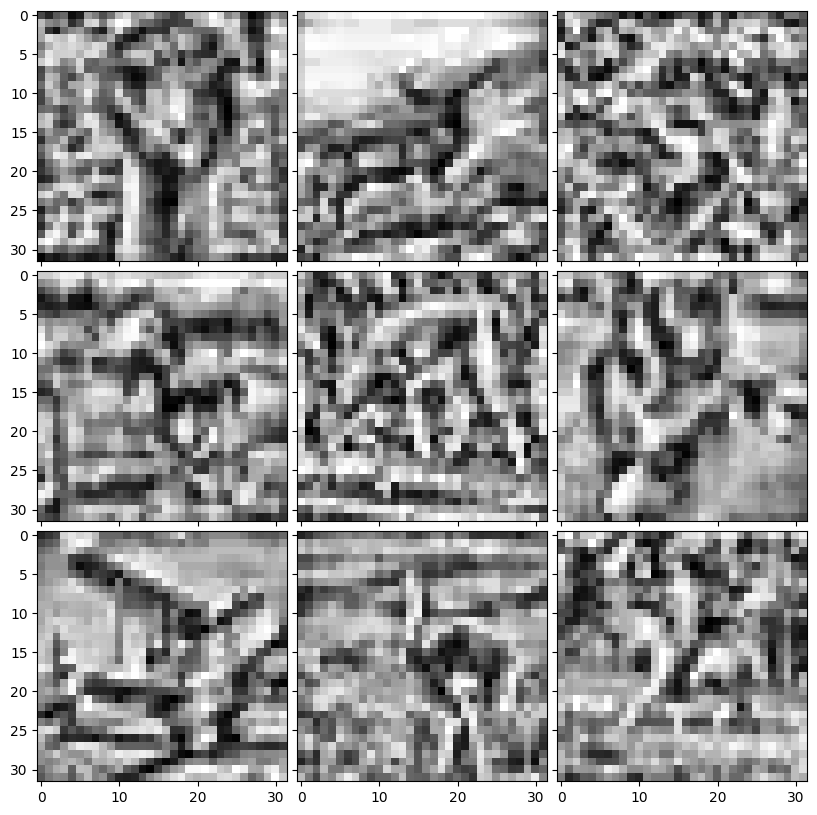

the accuracy of SVC rbf when C =  0.01  and Gamma =  0.01  is :  0.1905
the accuracy of SVC rbf when C =  0.01  and Gamma =  0.1  is :  0.227
the accuracy of SVC rbf when C =  0.01  and Gamma =  1  is :  0.0985
the accuracy of SVC rbf when C =  0.01  and Gamma =  10  is :  0.209
the accuracy of SVC rbf when C =  0.01  and Gamma =  100  is :  0.0955
the accuracy of SVC rbf when C =  0.1  and Gamma =  0.01  is :  0.227
the accuracy of SVC rbf when C =  0.1  and Gamma =  0.1  is :  0.24
the accuracy of SVC rbf when C =  0.1  and Gamma =  1  is :  0.0985
the accuracy of SVC rbf when C =  0.1  and Gamma =  10  is :  0.209
the accuracy of SVC rbf when C =  0.1  and Gamma =  100  is :  0.0955
the accuracy of SVC rbf when C =  1  and Gamma =  0.01  is :  0.323
the accuracy of SVC rbf when C =  1  and Gamma =  0.1  is :  0.363
the accuracy of SVC rbf when C =  1  and Gamma =  1  is :  0.1635
the accuracy of SVC rbf when C =  1  and Gamma =  10  is :  0.179
the accuracy of SVC rbf when C =  1  a

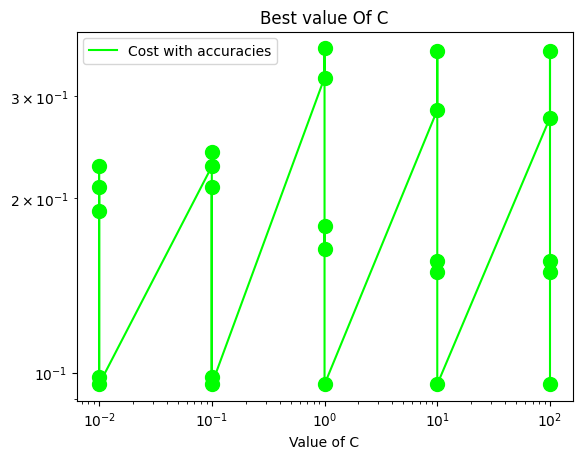

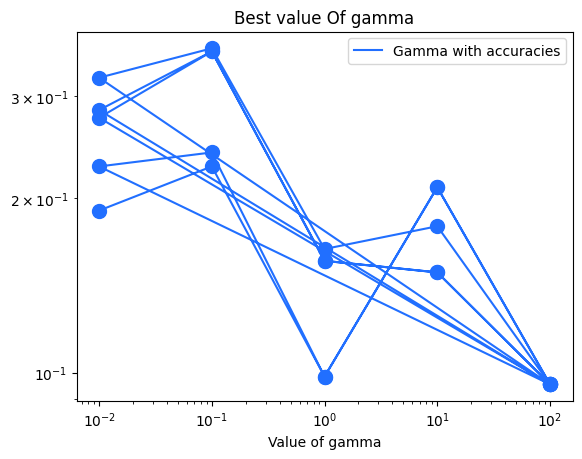

<module 'matplotlib.pyplot' from 'C:\\Users\\Hosam\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [94]:
######################### Bonus question 
######################### feature extraction by applying sobel edge detection on the equalized images

import skimage
from skimage import exposure
from skimage.filters import sobel
accuracies_clf_SVC = []

x_train = x_train.reshape(7000,32,32,3)

x_test = x_test.reshape(2000,32,32,3)

def draw_grey_images(list_of_imgs):
  random.seed(42)
  try:
    fig = plt.figure(figsize=(20, 10))
    grid = ImageGrid(fig, 111, nrows_ncols=(3, 3), axes_pad=0.1)
    imageslist = []
    for i in range(9):
      index = random.randint(0, 6000)
      imageslist.append(list_of_imgs[index])

    for ax, im in zip(grid, imageslist):
      ax.imshow(im, cmap=plt.cm.gray)
  except:
    pass
  plt.show()

gray_scale_imgs_train = []
gray_scale_imgs_test = []

for i in range(len(x_train)):
  gray_scale_imgs_train.append(skimage.color.rgb2gray(x_train[i]))

for i in range(len(x_test)):
  gray_scale_imgs_test.append(skimage.color.rgb2gray(x_test[i]))

print("################################################# grey Images")
draw_grey_images(gray_scale_imgs_train)


equalizer_images_adaptive_train = []
equalizer_images_adaptive_test = []

for i in range(len(gray_scale_imgs_train)):
  equalizer_images_adaptive_train.append(exposure.equalize_adapthist(gray_scale_imgs_train[i]))

for i in range(len(gray_scale_imgs_test)):
  equalizer_images_adaptive_test.append(exposure.equalize_adapthist(gray_scale_imgs_test[i]))
    
print("################################################# Adaptive Histogram equalizer Images")
draw_grey_images(equalizer_images_adaptive_train)


sobel_over_adaptive_train = []
sobel_over_adaptive_test = []

for i in range(len(equalizer_images_adaptive_train)):
  sobel_over_adaptive_train.append(sobel(equalizer_images_adaptive_train[i]))

for i in range(len(equalizer_images_adaptive_test)):
  sobel_over_adaptive_test.append(sobel(equalizer_images_adaptive_test[i]))

print("################################################# sobel over Adaptive Histogram equalizer Images")
draw_grey_images(equalizer_images_adaptive_train)

sobel_over_adaptive_train = np.asarray(sobel_over_adaptive_train)
sobel_over_adaptive_train = sobel_over_adaptive_train.reshape(7000, 1024)

sobel_over_adaptive_test = np.asarray(sobel_over_adaptive_test)
sobel_over_adaptive_test = sobel_over_adaptive_test.reshape(2000, 1024)


start = time.time()
for cost in [0.01, 0.1, 1, 10, 100]:
    for gammaa in [0.01, 0.1, 1, 10, 100]:
        clf_SVC = SVC(C = cost, kernel='rbf', gamma = gammaa)
        clf_SVC.fit(sobel_over_adaptive_train, y_train.ravel())
        y_pred_clf_SVC = clf_SVC.predict(sobel_over_adaptive_test)
        print("the accuracy of SVC rbf when C = ",cost, " and Gamma = ", gammaa, " is : ", accuracy_score(y_test, y_pred_clf_SVC))
        accuracies_clf_SVC.append(accuracy_score(y_test, y_pred_clf_SVC))
        
stop = time.time()
print("Total Time is :", stop - start)

cost_values = [0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,10,10,10,10,10,100,100,100,100,100]
gamma_values = [0.01,0.1,1,10,100,0.01,0.1,1,10,100,0.01,0.1,1,10,100,0.01,0.1,1,10,100,0.01,0.1,1,10,100]

print("the length of the cost values list is : ", len(cost_values))
print("the length of the gamma values list is : ", len(gamma_values))

Plot(cost_values, accuracies_clf_SVC,'Cost with accuracies','#00FF00', 'o' , 100 , 'Accuracies' ,'Value of C' , 'Best value Of C')
Plot(gamma_values, accuracies_clf_SVC,'Gamma with accuracies','#216fff', 'o' , 100 , 'Accuracies', 'Value of gamma', 'Best value Of gamma')

the accuracy of the best model is :  0.37


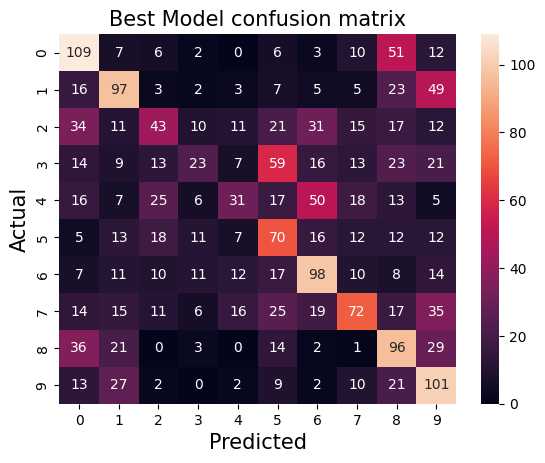

In [96]:
# based on the Accuracies the best model is LinearSVC 

x_train = x_train.reshape(7000,3072)

x_test = x_test.reshape(2000,3072)

Best_model = LinearSVC(multi_class='ovr', C = 0.0001, penalty='l1', dual = False)
Best_model.fit(x_train, y_train.ravel())
Best_model_y_pred = Best_model.predict(x_test)
print("the accuracy of the best model is : " , accuracy_score(y_test, Best_model_y_pred))
Best_Model_CF = ConfusionMatrix(y_test, Best_model_y_pred)
PLOT_ConfusionMatrix(Best_Model_CF,"Best Model confusion matrix")

## Part 4. Write a Conclusion (1 Mark)

Write a conclusion comparing the results from each part of the assignment. Comment on the suitability of each method for this task.

## Conclusion

1- for the data preparation: i took 700 samples from each class hence the train is (7000,32,32,3) and the test is (2000, 32,32,3), and of course, I need to reshape it before training.

2- for the KNN: the results are the same as sklearn KNN in terms of accuracy, but for speed, sklearn KNN is faster because they use other algorithms to compute the nearest neighbors.
but overall I think that KNN is not suitable for image classification problems because KNN does not use any of the image features to learn these images, knn just computes the distances and decides based on the nearest neighbors.

3- for the logistic regression: logistic regression is a linear model and it performed better than KNN is that mean the dataset is linearly separable ? or it performed better than KNN because of using OVR?

4- for the SVM: the baseline model did not improve the result, but by decreasing the cost parameter and adding the regularization term "L1" the accuracy increased a lot (this is the best model, C = 0.0001, "L1").

and I think LinearSVC performed better because the data is linearly separable.

which explains why SVC(Kernal = "rbf") gave me the same accuracy all the times (even with parameters tuning) before applying features scaling (I just apply features scaling over SVC(C = cost, kernel='rbf', gamma = gammaa) only).

5- Finally for the bouns question I have applied feature extraction technique which is sobel over Adaptive Histogram equalizer which relatively gave me overall better results than the SVC with non-linear kernal "rbf", and it is gave close results to the best model which is : LinearSVC(multi_class='ovr', C = 0.0001, penalty='l1', dual = False).

<!-- Write your conclusion here -->